##Data Set-up

#0. Import the data and declare your package dependencies

In [2]:
import pandas as pd
import numpy as np

avocado = pd.read_csv('/Users/oscarluo/Documents/GSB-544/Week_2/Data/avocado-updated-2020.csv')

#1. Briefly describe the data set. What information does it contain?

In [3]:
# Show head and tail
pd.concat([avocado.head(), avocado.tail()])

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico
33044,2020-11-29,1.35,24106.58,1236.96,617.80,1564.98,20686.84,17824.52,2862.32,0.00,organic,2020,West Tex/New Mexico


This contains weekly sales data from 01/04/2015 until 11/29/2020 for avocados.

#2. Clean the data in any way you see fit.

In [4]:
# Show unique values
avocado['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico'], dtype=object)

In [5]:
# Map geography regions to new variable region_category
avocado["region_category"] = avocado["geography"].map({
"Total U.S.": "Total",
"West": "Major",
"Northeast": "Major",
"Southeast": "Major",
"South Central": "Major",
"Midsouth": "Major",
"Great Lakes": "Major",
"California": "State",
"South Carolina": "State",
"Nothern New England": "State",
"West Tex/New Mexico": "State",
})

# All other regions "Metro"
avocado["region_category"].fillna("Metro", inplace=True)

# Rename columns 4046, 4225, and 4770
avocado.rename(columns = {
    "4046": "Small",
    "4225": "Medium",
    "4770": "Large"
}, inplace = True)

avocado.head()

<positron-console-cell-5>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




,date,average_price,total_volume,Small,Medium,Large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_category
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro


##Exercises

#3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [6]:
# Filter by major, organic, and 2017
major_organic_2017 = avocado[
    (avocado["region_category"] == "Major") &
    (avocado["type"] == "organic") &
    (avocado["year"] == 2017)  
]

# Group by Geography and descending
major_organic_2017.groupby("geography")["Small"].sum().sort_values(ascending = False)


geography
West             1870206.29
South Central    1717104.19
Northeast         925832.36
Southeast         285124.34
Great Lakes       202487.68
Midsouth          186395.50
Name: Small, dtype: float64

West sold the most total organic, small Hass avocados in 2017.

#4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [7]:
# Convert date column into datetime format
avocado["date"] = pd.to_datetime(avocado["date"])

# Create month, day, and year columns
avocado["month"] = avocado["date"].dt.month
avocado["day"] = avocado["date"].dt.day
avocado["year"] = avocado["date"].dt.year

# Group by month sorting by descending
avocado.groupby("month") ["total_volume"].mean().sort_values(ascending = False)

month
5     1.123632e+06
2     1.095374e+06
6     1.051247e+06
4     1.016582e+06
3     9.957150e+05
1     9.853122e+05
7     9.832681e+05
8     9.499249e+05
9     9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

May has the highest average volume of avocado sales.

#5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [8]:
# Filtering by metro
metro = avocado[(avocado["region_category"] == "Metro")]

# Group by geography and descending order
metro.groupby("geography")["Small"].sum().sort_values(ascending = False).head(5)

geography
Los Angeles         3.633427e+08
Plains              2.746579e+08
Dallas/Ft. Worth    2.017119e+08
Houston             1.841637e+08
Phoenix/Tucson      1.799064e+08
Name: Small, dtype: float64

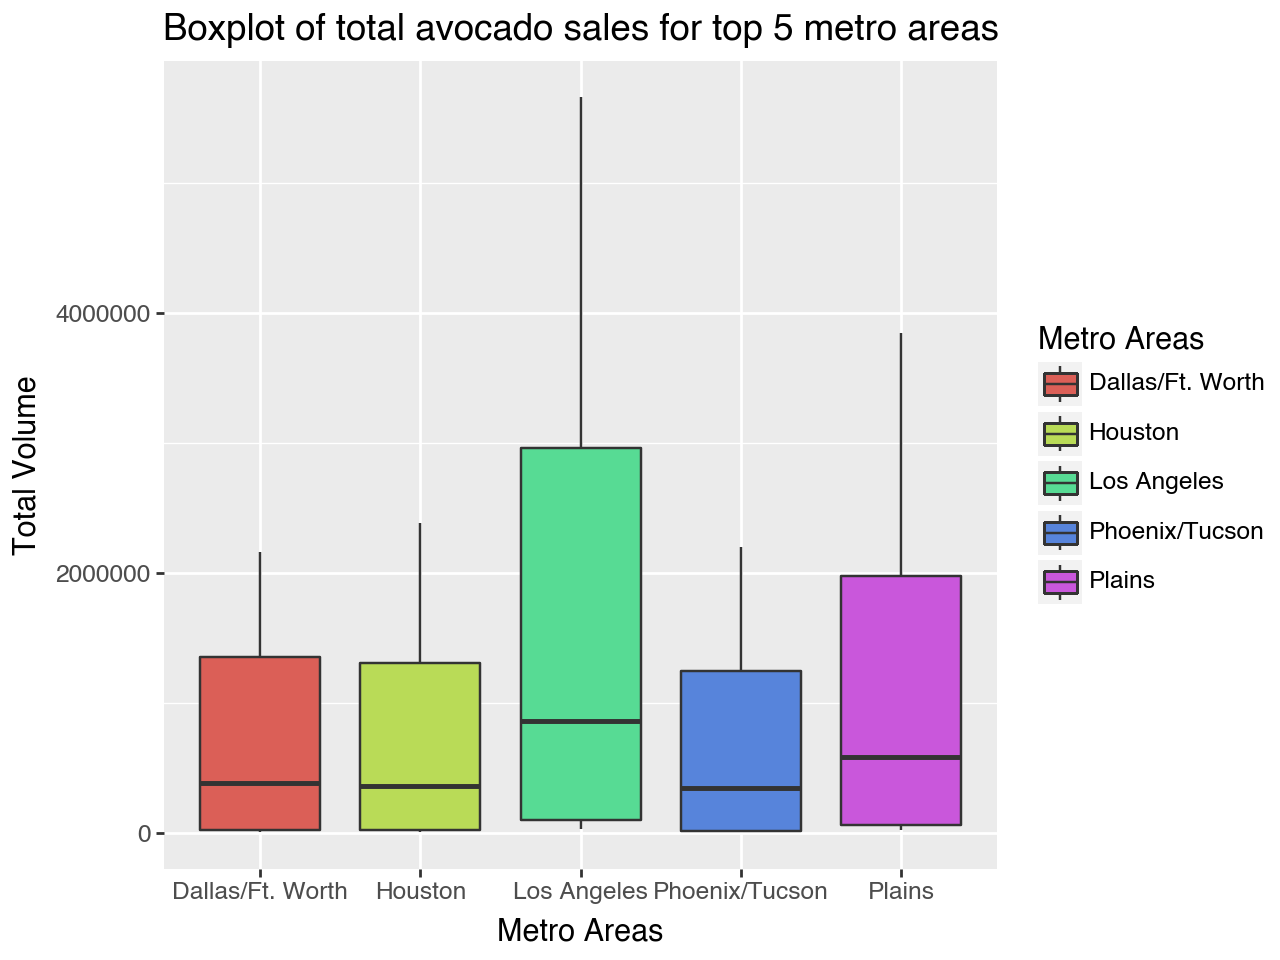

In [9]:
# Import library
import plotnine as p9

# Filter only top 5 metros
metro5 = avocado[
    (avocado["geography"] == "Los Angeles") |
    (avocado["geography"] == "Plains") |
    (avocado["geography"] == "Dallas/Ft. Worth") |
    (avocado["geography"] == "Houston") |
    (avocado["geography"] == "Phoenix/Tucson") 
]

# Create boxplot
(
    p9.ggplot(metro5,
    p9.aes(x = "geography",
    y = "total_volume",
    fill = "geography"))
    + p9.geom_boxplot()

    # Add axis
    + p9.labs(x = "Metro Areas",
    y = "Total Volume",
    fill = "Metro Areas",
    title = "Boxplot of total avocado sales for top 5 metro areas")
)

##Pivoting

#6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [10]:
CA = avocado[
    (avocado["geography"] == "San Francisco") |
    (avocado["geography"] == "Los Angeles") |
    (avocado["geography"] == "Sacramento") | 
    (avocado["geography"] == "San Diego") 
]

#7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [11]:
# Long to wide using pivot aggfunc = "mean" to find mean prices
wide_CA = CA.pivot_table(index = "geography", columns = "type", values = "average_price", aggfunc="mean")

# Reset the index to turn 'geography' back into a column
wide_CA = wide_CA.reset_index()

# Create a new column for the price difference between organic and conventional avocados
wide_CA['price_difference'] = wide_CA['organic'] - wide_CA['conventional']

wide_CA

type,geography,conventional,organic,price_difference
0,Los Angeles,1.047124,1.574902,0.527778
1,Sacramento,1.295359,1.873856,0.578497
2,San Diego,1.113856,1.798366,0.684510
3,San Francisco,1.400490,2.119444,0.718954


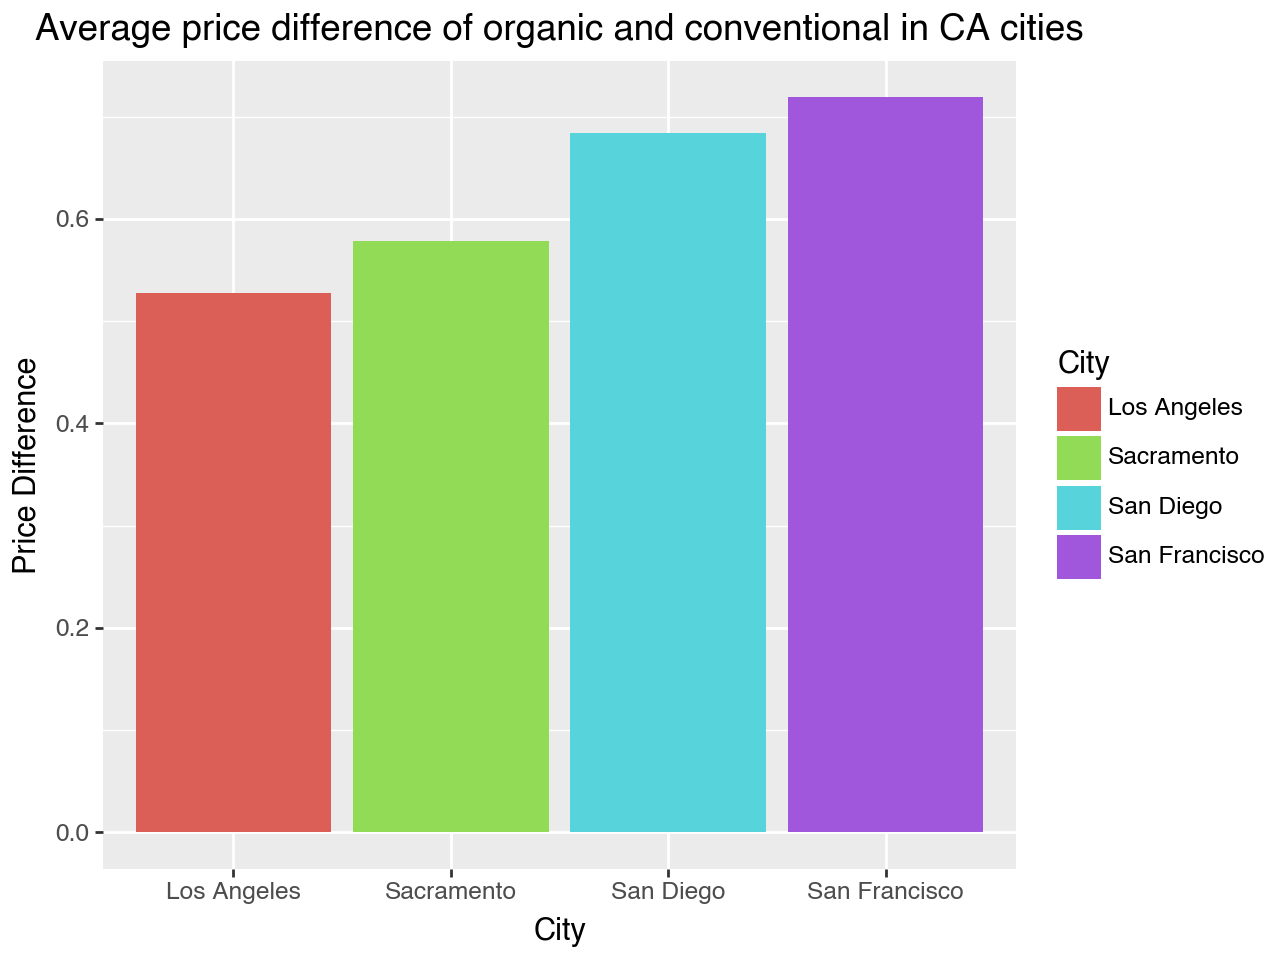

In [19]:
(
    p9.ggplot(wide_CA,
    p9.aes(
        x = "geography",
        y = "price_difference",
        fill = "geography"
    ))

    #stat = "identity" to plot specfic values from dataset
    + p9.geom_bar(stat = "identity")

    # Add axis
    + p9.labs(x = "City",
    y = "Price Difference",
    fill = "City",
    title = "Average price difference of organic and conventional in CA cities")    
)

San Francisco has the biggest difference in average price out of the four cities as shown on the plot based on the price difference of average avocado price that was computed.

#8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [13]:
# Convert to long format
long_CA = pd.melt(CA, 
                    id_vars=["geography", "type"], 
                    value_vars=["Small", "Medium", "Large"], 
                    var_name="size", 
                    value_name="sales")

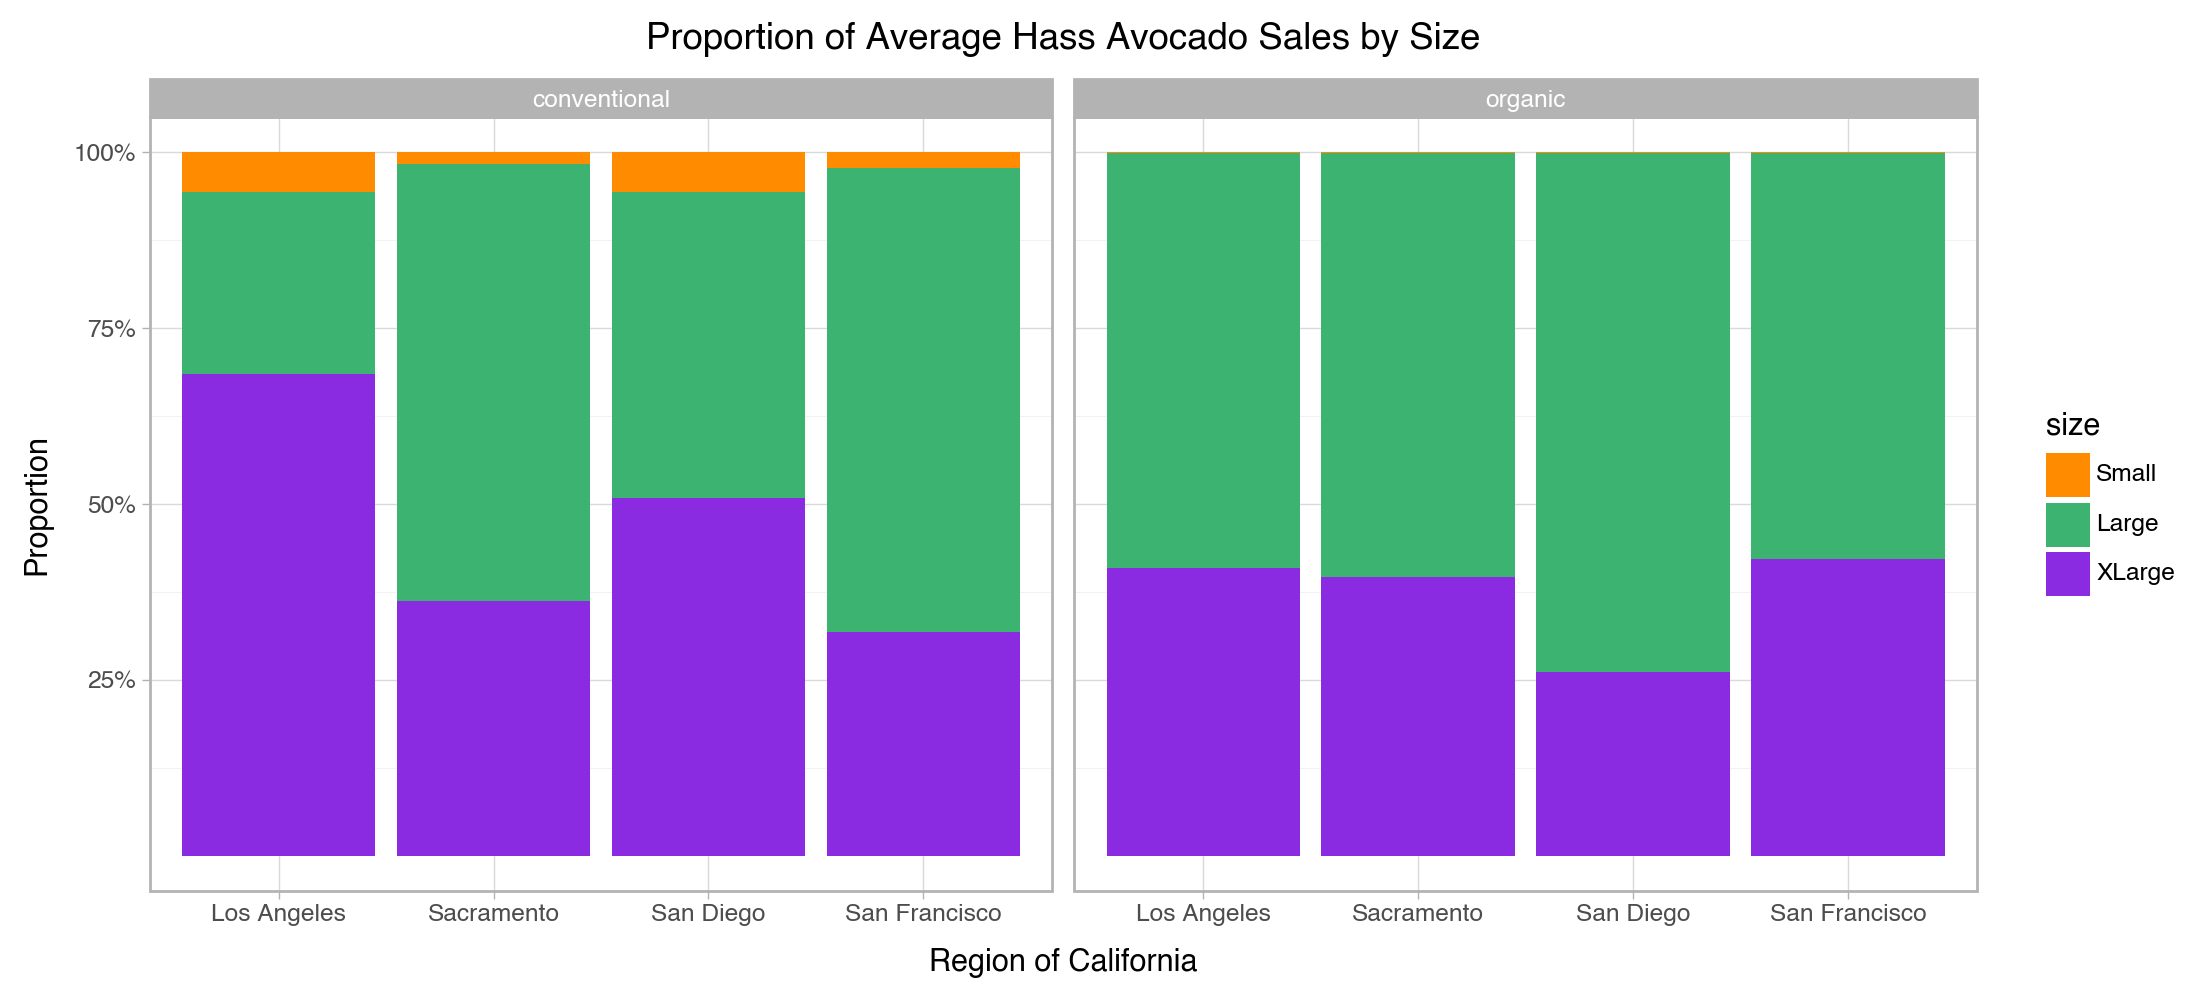

In [14]:
(
    p9.ggplot(long_CA, p9.aes(x='geography', y='sales', fill='size'))
    + p9.geom_bar(stat='identity', position='fill')  # Use 'fill' to make bars proportional
    + p9.facet_wrap('~type')  # Separate facets for conventional and organic
    + p9.labs(
        x='Region of California',
        y='Proportion',
        title='Proportion of Average Hass Avocado Sales by Size'
    )
    # Change colors
    + p9.scale_fill_manual(values=['darkorange', 'mediumseagreen', 'blueviolet'], labels=['Small', 'Large', 'XLarge'])

    # Background theme
    + p9.theme_light()

    # Label y axis
    + p9.scale_y_continuous(
        breaks=[0.25, 0.5, 0.75, 1],
        labels=["25%", "50%", "75%", "100%"]
    )
    # Height and width
    + p9.theme(figure_size=(11, 5))
)

##Using Outside Data

#A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [15]:
housing = pd.read_csv('/Users/oscarluo/Documents/GSB-544/Week_2/Data/Metro_sales_count_now_uc_sfrcondo_month.csv')

housing.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,...,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
0,102001,0,United States,country,NaN,200263.0,231896.0,257463.0,283461.0,296547.0,300130.0,282818.0,266867.0,257379.0,189529.0,215778.0,162904.0,176600.0,225595.0,239271.0,260164.0,308430.0,315687.0,287917.0,283878.0,298259.0,276828.0,258380.0,180215.0,190262.0,283094.0,302464.0,312434.0,343742.0,250225.0,252780.0,263036.0,229509.0,219186.0,245723.0,...,494880.0,579637.0,542616.0,534119.0,499946.0,476773.0,458685.0,459540.0,345215.0,334447.0,441561.0,439319.0,464680.0,482675.0,412149.0,428785.0,379953.0,332027.0,286113.0,272462.0,211294.0,232310.0,317884.0,294413.0,355881.0,379100.0,325284.0,354011.0,307261.0,295286.0,258258.0,246648.0,211949.0,234310.0,282773.0,318615.0,350767.0,326229.0,340368.0,332735.0
1,394913,1,"New York, NY",msa,NY,8416.0,8883.0,9809.0,10081.0,10685.0,13636.0,12201.0,10916.0,10431.0,8104.0,8729.0,6389.0,5656.0,6497.0,6871.0,7921.0,9386.0,11147.0,11574.0,11185.0,11313.0,13755.0,11588.0,8803.0,7015.0,18423.0,9475.0,9843.0,14040.0,12532.0,10239.0,NaN,8640.0,8455.0,8722.0,...,18530.0,23493.0,23018.0,23880.0,21099.0,21636.0,19649.0,20798.0,18519.0,15228.0,18338.0,16448.0,17902.0,21234.0,19507.0,20758.0,16815.0,15084.0,14285.0,13202.0,11167.0,9771.0,12056.0,10748.0,12934.0,15121.0,13501.0,15506.0,13089.0,12858.0,11143.0,10675.0,10345.0,8916.0,10063.0,10993.0,12208.0,12446.0,13878.0,14512.0
2,753899,2,"Los Angeles, CA",msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,11283.0,12490.0,11626.0,11302.0,10902.0,10496.0,9993.0,10128.0,7306.0,7196.0,10348.0,9912.0,9420.0,9226.0,7506.0,7867.0,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0
3,394463,3,"Chicago, IL",msa,IL,5570.0,6908.0,7230.0,7931.0,8781.0,8830.0,8174.0,7598.0,6622.0,4669.0,4951.0,3674.0,3681.0,4787.0,5244.0,6191.0,7971.0,8898.0,8523.0,8306.0,8848.0,8159.0,7063.0,4819.0,4701.0,6911.0,8160.0,8687.0,10467.0,6729.0,6669.0,6049.0,5545.0,5247.0,5893.0,...,16399.0,19856.0,18982.0,18315.0,15689.0,14066.0,13359.0,12481.0,9681.0,8530.0,12383.0,12704.0,13720.0,14908.0,12464.0,12098.0,10896.0,9063.0,8062.0,7221.0,5413.0,5633.0,8693.0,8447.0,10344.0,11497.0,9535.0,10380.0,8714.0,8369.0,7022.0,7129.0,5512.0,5765.0,7661.0,9277.0,10195.0,9768.0,10487.0,10850.0
4,394514,4,"Dallas, TX",msa,TX,4875.0,5519.0,5988.0,6679.0,6672.0,6556.0,6244.0,5473.0,4659.0,3458.0,4041.0,3008.0,3627.0,4564.0,4634.0,5214.0,5892.0,6161.0,5444.0,5082.0,5339.0,4751.0,4266.0,2871.0,3504.0,5219.0,6147.0,6353.0,5871.0,4390.0,4507.0,4038.0,3837.0,3634.0,3950.0,...,9105.0,10176.0,9916.0,9966.0,9266.0,8548.0,8199.0,8078.0,5957.0,6082.0,7960.0,8116.0,8875.0,8923.0,8010.0,8344.0,7200.0,6163.0,5087.0,4967.0,3739.0,5170.0,6675.0,6353.0,7750.0,7666.0,6745.0,6928.0,5634.0,5240.0,4625.0,4706.0,4207.0,5137.0,6144.0,6969.0,7458.0,6465.0,6758.0,6677.0


In [16]:
# Remove state from RegionName
housing['RegionName'] = housing['RegionName'].str.split(',').str[0] 

housing_ca = housing[
    (housing["RegionName"] == "San Francisco") |
    (housing["RegionName"] == "Los Angeles") |
    (housing["RegionName"] == "Sacramento") | 
    (housing["RegionName"] == "San Diego") 
]

# Merge the datasets on the relevant columns
combined = housing_ca.merge(
    avocado,
    left_on = "RegionName",
    right_on = "geography",      
    how = "inner"                 
)

combined.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,date,average_price,total_volume,Small,Medium,Large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_category,month,day
0,753899,2,Los Angeles,msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4
1,753899,2,Los Angeles,msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro,1,4
2,753899,2,Los Angeles,msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,Los Angeles,Metro,1,11
3,753899,2,Los Angeles,msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,Los Angeles,Metro,1,11
4,753899,2,Los Angeles,msa,CA,4141.0,5044.0,6065.0,6868.0,7222.0,8227.0,7811.0,7786.0,8535.0,6496.0,7738.0,5974.0,6115.0,7825.0,8142.0,8544.0,9889.0,10223.0,9023.0,9117.0,9522.0,8180.0,9473.0,6530.0,6684.0,9195.0,9085.0,9949.0,10523.0,8744.0,8358.0,8306.0,7515.0,7300.0,8640.0,...,7255.0,6251.0,5413.0,5204.0,4192.0,4608.0,6659.0,6004.0,7140.0,7266.0,6190.0,6954.0,5737.0,5766.0,5119.0,4974.0,4401.0,4980.0,6101.0,6714.0,7119.0,6380.0,7027.0,7315.0,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,Los Angeles,Metro,1,18


In [17]:
# Filter house price columns to include only dates from 2008 to 2024
house_price = [col for col in combined.columns if '2008' <= col <= '2024']

# Calculate the average house price over the years 2008 to 2024 for each region
average_prices = combined[house_price].mean(axis=1)

# Ensure the array has the same length as the DataFrame by using np.array
average_prices_array = np.array(average_prices)

# Assign the calculated average prices to the DataFrame column
combined['average_house_price_2008_2024'] = average_prices_array

# Drop rows with missing values in the relevant columns for the plot
cleaned_combined = combined.dropna(subset=['average_house_price_2008_2024', 'total_volume', 'geography'])

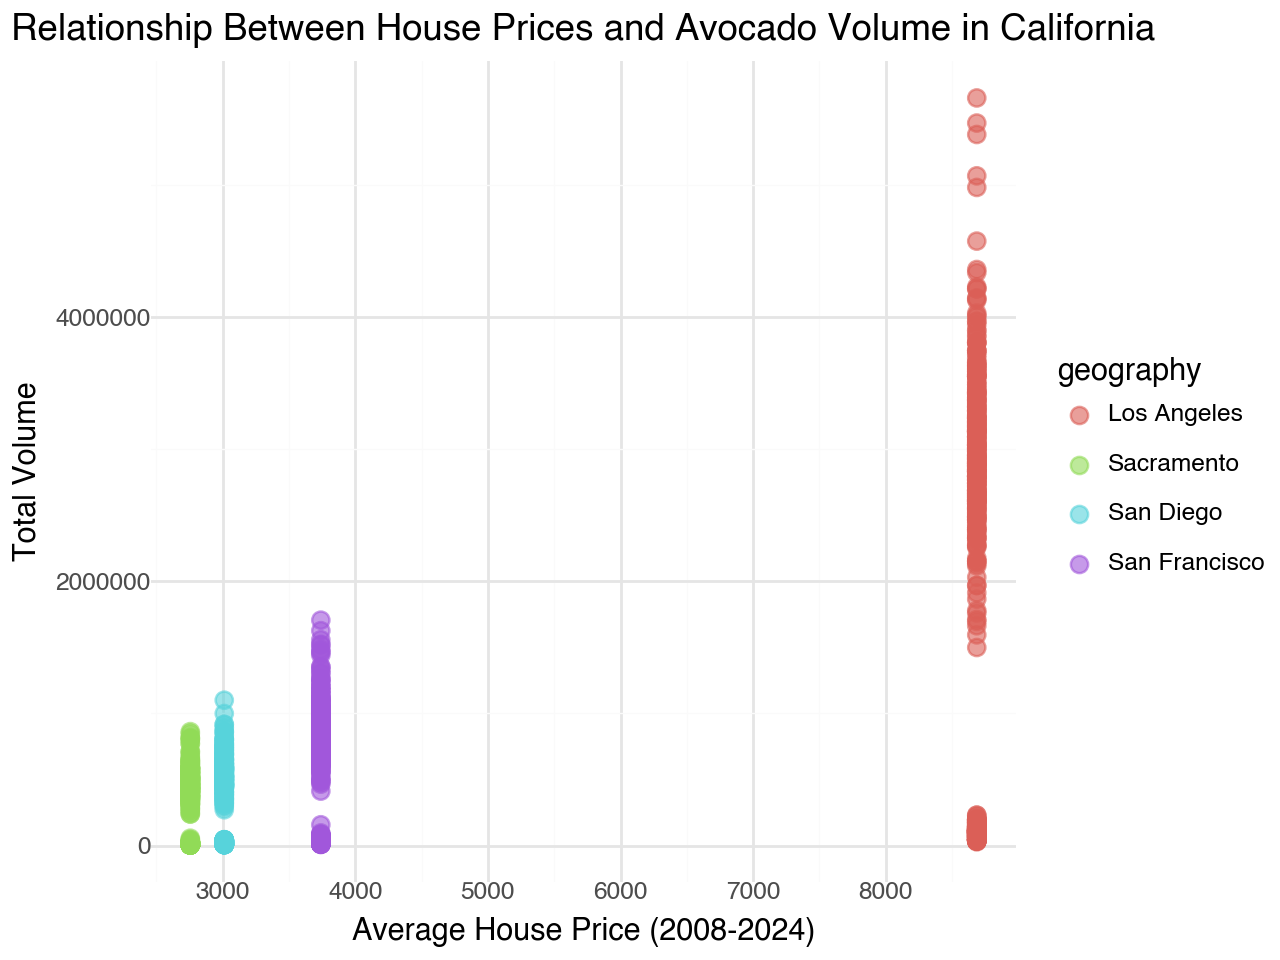

In [18]:
(
    p9.ggplot(cleaned_combined, 
              p9.aes(x='average_house_price_2008_2024', 
                     y='total_volume',
                     color='geography')) 
    
    #Scatterplot
    + p9.geom_point(size=3, alpha=0.6)

    # Label axis
    + p9.labs(
        x="Average House Price (2008-2024)",
        y="Total Volume",
        title="Relationship Between House Prices and Avocado Volume in California"
    )
    + p9.theme_minimal()
)